In [2]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import sklearn.linear_model as skl
from sklearn.metrics import r2_score

from scipy import stats as st

In [38]:
totale = pd.read_csv("/home/francesco/Codici/Computazionale/dc0/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv" , header = 0 )
totale.describe()


,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
count,173.000000,173.000000,173.000000,173.000000
mean,1936.000000,-0.078973,-0.176930,0.018984
std,50.084928,0.369607,0.408487,0.334411
min,1850.000000,-0.597561,-0.728832,-0.466290
25%,1893.000000,-0.341332,-0.486397,-0.210125
50%,1936.000000,-0.176805,-0.263519,-0.074705
75%,1979.000000,0.077631,0.013469,0.193821
max,2022.000000,0.932927,0.901764,0.964091


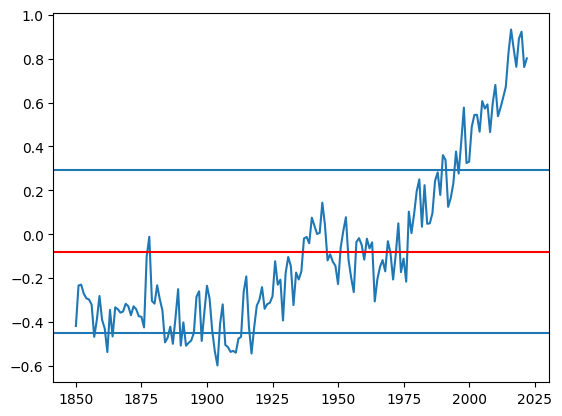

In [58]:
plt.plot(totale['Time'] , totale['Anomaly (deg C)'])
plt.axhline(y=totale['Anomaly (deg C)'].mean() , color = 'r')
plt.axhline(y = totale['Anomaly (deg C)'].mean() +  totale['Anomaly (deg C)'].std())
plt.axhline(y = totale['Anomaly (deg C)'].mean() -  totale['Anomaly (deg C)'].std())

#Sarebbe da fare bene sto grafico

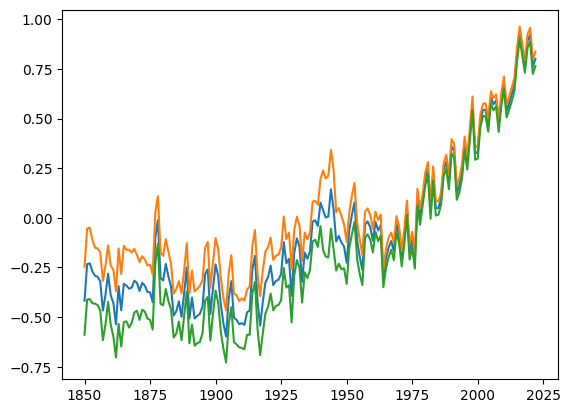

In [9]:
plt.plot(totale['Time'] , totale['Anomaly (deg C)'])
plt.plot(totale['Time'] , totale['Upper confidence limit (97.5%)'] )
plt.plot(totale['Time'] , totale['Lower confidence limit (2.5%)'])

In [59]:
def regressione(data) :
    X = np.zeros((len(data['Anomaly (deg C)']) , 2))
    X[:,0] = 1
    X[:,1] = data['Time']
    clf = skl.LinearRegression().fit(X , data['Anomaly (deg C)'])
    fity = clf.predict(X)
    devstd = r2_score(data['Anomaly (deg C)'] , fity)

    result = [fity , devstd]
    return result



In [47]:
filtro_post = totale[totale['Time'] < 1975].index
filtro_pre = totale[totale['Time'] > 1975].index

post_1975 = totale.drop(filtro_post)
pre_1975 = totale.drop(filtro_pre)

fit_tot = regressione(totale)
fit_post = regressione(post_1975)
fit_pre = regressione(pre_1975)

,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
count,126.000000,126.000000,126.000000,126.000000
mean,1912.500000,-0.265816,-0.387727,-0.143905
std,36.517119,0.171393,0.188182,0.163111
min,1850.000000,-0.597561,-0.728832,-0.466290
25%,1881.250000,-0.392109,-0.536422,-0.260730
50%,1912.500000,-0.292529,-0.425475,-0.154533
75%,1943.750000,-0.123292,-0.230313,-0.050770
max,1975.000000,0.144105,0.013469,0.342705


0.3862530799372248 0.890071247898073


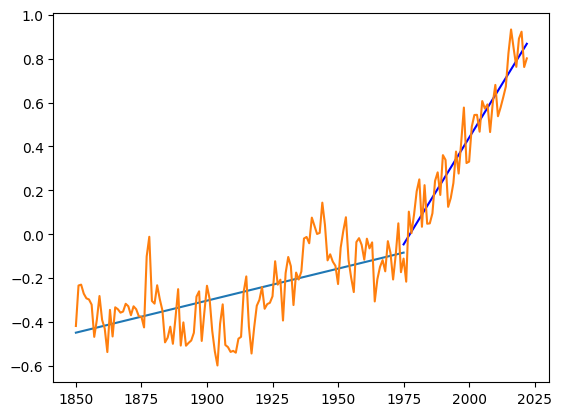

In [12]:
plt.plot(post_1975['Time'] , fit_post[0], c = 'b')
plt.plot(pre_1975['Time'] , fit_pre[0])
plt.plot(totale['Time'] , totale['Anomaly (deg C)'])

print(fit_pre[1] , fit_post[1])

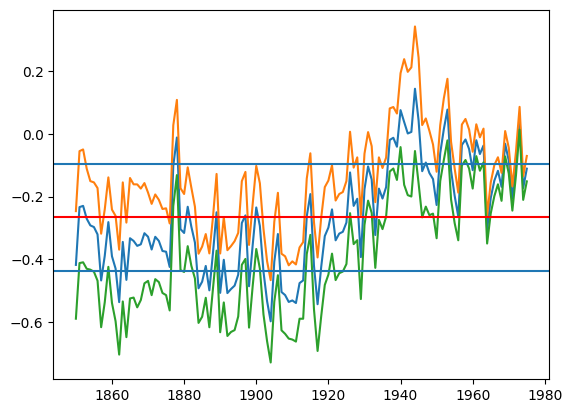

In [63]:
plt.plot(pre_1975['Time'] , pre_1975['Anomaly (deg C)'])
plt.plot(pre_1975['Time'] , pre_1975['Upper confidence limit (97.5%)'])
plt.plot(pre_1975['Time'] , pre_1975['Lower confidence limit (2.5%)'])
plt.axhline(y = pre_1975['Anomaly (deg C)'].mean() , color = 'r')
plt.axhline(y = pre_1975['Anomaly (deg C)'].mean() +  pre_1975['Anomaly (deg C)'].std())
plt.axhline(y = pre_1975['Anomaly (deg C)'].mean() -  pre_1975['Anomaly (deg C)'].std())


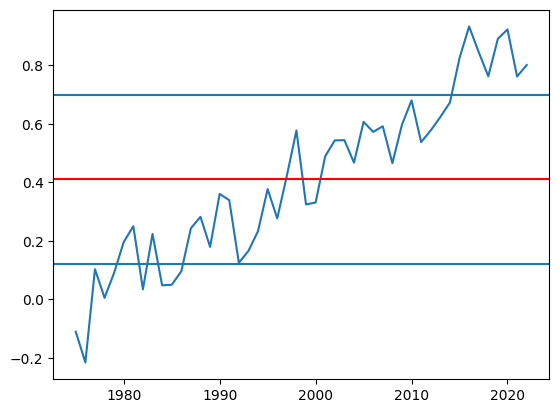

In [61]:
plt.plot(post_1975['Time'] , post_1975['Anomaly (deg C)'])
plt.axhline(y = post_1975['Anomaly (deg C)'].mean() , color = 'r')
plt.axhline(y = post_1975['Anomaly (deg C)'].mean() +  post_1975['Anomaly (deg C)'].std())
plt.axhline(y = post_1975['Anomaly (deg C)'].mean() -  post_1975['Anomaly (deg C)'].std())


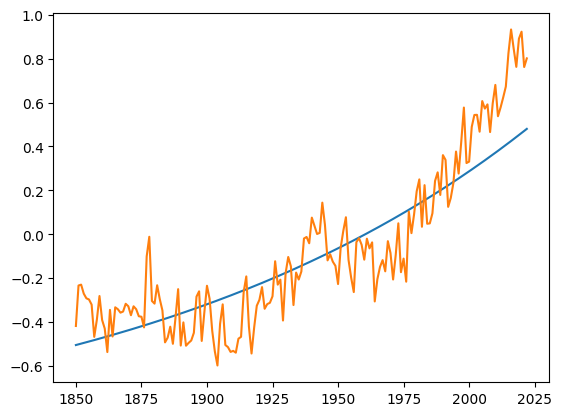

In [13]:
p = np.polyfit(totale['Time'] , np.log(totale['Anomaly (deg C)'] + 1) , 1)
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(totale['Time']), np.max(totale['Time']), 172)
y_fitted = a * np.exp(b * x_fitted) -1

plt.plot(x_fitted , y_fitted)
plt.plot(totale['Time'] , totale['Anomaly (deg C)'])

In [45]:
def power_low(n , data) : 

    #valori medi
    p = np.polyfit(data['Time'] , data['Anomaly (deg C)']  , n )
    y_fitted = np.zeros(data['Time'].count())
    x_fitted = np.linspace(np.min(data['Time']), np.max(data['Time']), data['Time'].count())
    for i in range(n+1) : 
        y_fitted += p[i] * x_fitted**(n-i)
    plt.plot(x_fitted , y_fitted)
    plt.plot(totale['Time'] , totale['Anomaly (deg C)'])

    #media + devstd
    p = np.polyfit(data['Time'] , data['Upper confidence limit (97.5%)']  , n )
    y_fitted = np.zeros(data['Time'].count())
    x_fitted = np.linspace(np.min(data['Time']), np.max(data['Time']), data['Time'].count())
    for i in range(n+1) : 
        y_fitted += p[i] * x_fitted**(n-i)
    plt.plot(x_fitted , y_fitted)

    #media - devstd
    p = np.polyfit(data['Time'] , data['Lower confidence limit (2.5%)']  , n )
    y_fitted = np.zeros(data['Time'].count())
    x_fitted = np.linspace(np.min(data['Time']), np.max(data['Time']), data['Time'].count())
    for i in range(n+1) : 
        y_fitted += p[i] * x_fitted**(n-i)
    plt.plot(x_fitted , y_fitted)

    plt.show()



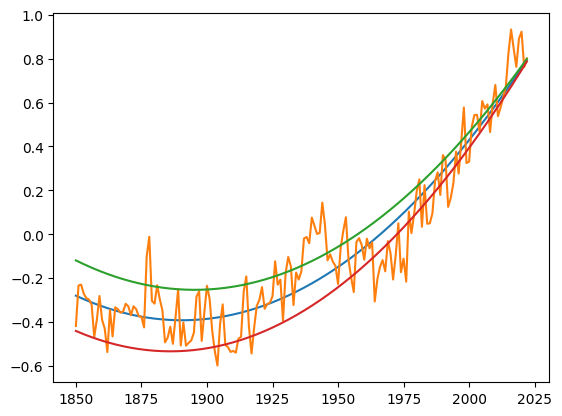

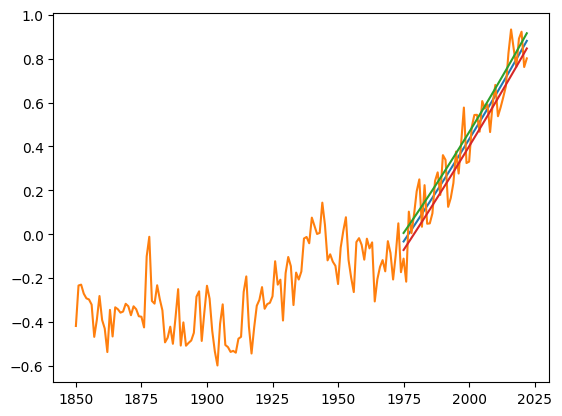

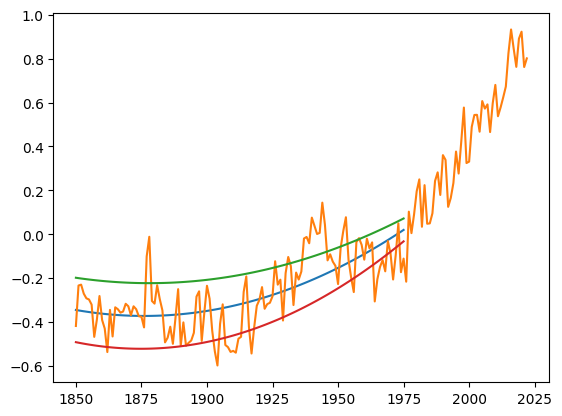

In [48]:
power_low(2 , totale)
power_low(2 , post_1975)
power_low(2 , pre_1975)

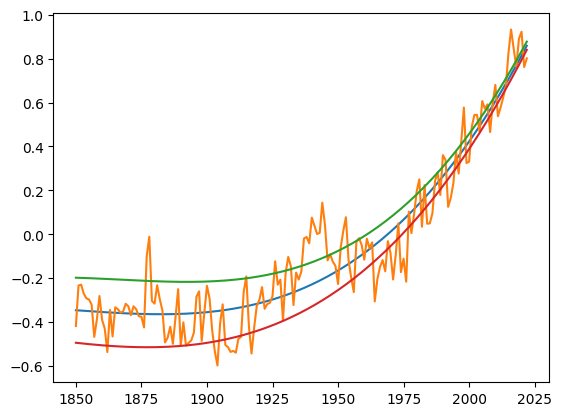

In [50]:
power_low(3 , totale)

In [55]:
def filtro_5(inizio) :
    filtro1 = totale[totale['Time'] < inizio ].index
    filtro2 = totale[totale['Time'] > inizio + 5].index
    data = totale.drop(filtro1)
    data = data.drop(filtro2)

    return data
    

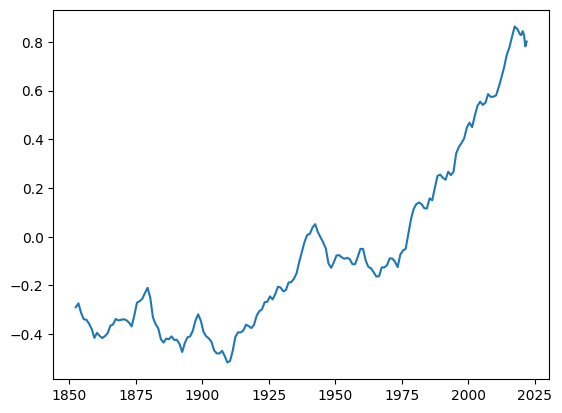

In [56]:
date = np.array([])
medie = np.array([])
for i in range(totale['Time'].min() , totale['Time'].max() + 1, 1) :
    date = np.append(date , filtro_5(i)['Time'].mean())
    medie = np.append(medie , filtro_5(i)['Anomaly (deg C)'].mean())

plt.plot(date, medie)

dati_linearizzati = {'Time' : date , "Anomaly (deg C)" : medie }

dati_linearizzati = pd.DataFrame(dati_linearizzati)


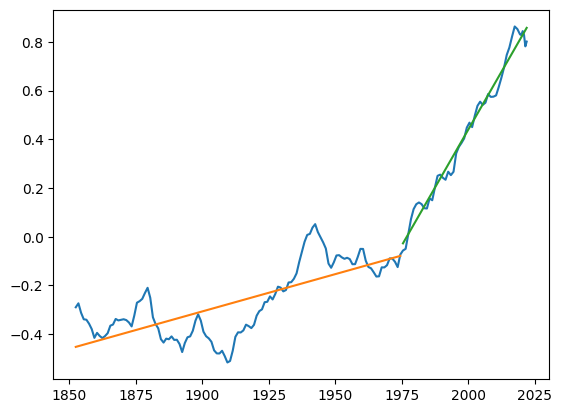

In [18]:

plt.plot(dati_linearizzati['Time'] , dati_linearizzati['Anomaly (deg C)'])


filtro_post = dati_linearizzati[dati_linearizzati['Time'] < 1975].index
filtro_pre = dati_linearizzati[dati_linearizzati['Time'] > 1975].index

post_1975 = dati_linearizzati.drop(filtro_post)
pre_1975 = dati_linearizzati.drop(filtro_pre)

fit_linearizzati = regressione(dati_linearizzati)
fit_post = regressione(post_1975)
fit_pre = regressione(pre_1975)

plt.plot(pre_1975['Time'] , fit_pre[0])
plt.plot(post_1975['Time'] , fit_post[0])


In [22]:
emissioni = pd.read_csv("/home/francesco/Codici/Computazionale/dc0/global.1751_2014.csv")
emissioni = emissioni.drop(['Carbon emissions from gas fuel consumption' , 'Carbon emissions from liquid fuel consumption' , 'Carbon emissions from solid fuel consumption', 'Carbon emissions from cement production' ,'Carbon emissions from gas flaring' ,'Per capita carbon emissions (metric tons of carbon; after 1949 only)'] , axis = 1)
emissioni = emissioni.drop(0)

#conversione in numeri
emissioni['Year'] = pd.to_numeric(emissioni['Year'])
emissioni['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] = pd.to_numeric(emissioni['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'])
filro = emissioni[emissioni['Year'] < 1850].index
emissioni = emissioni.drop(filro)
emissioni

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
100,1850,54
101,1851,54
102,1852,57
103,1853,59
104,1854,69
...,...,...
260,2010,9128
261,2011,9503
262,2012,9673
263,2013,9773


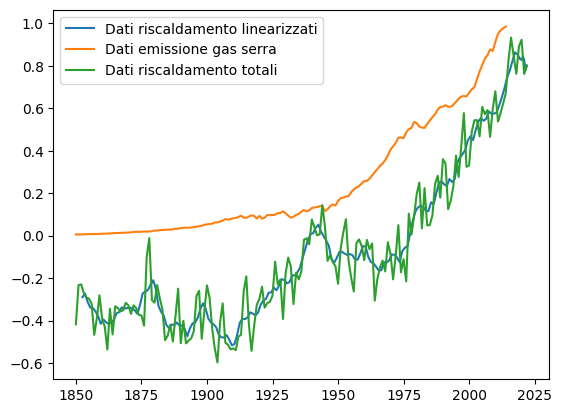

In [23]:
plt.plot(dati_linearizzati['Time'] , dati_linearizzati['Anomaly (deg C)'] , label = "Dati riscaldamento linearizzati")
plt.plot(emissioni['Year'] , 0.0001 * emissioni['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] , label = "Dati emissione gas serra")
plt.plot(totale['Time'] , totale['Anomaly (deg C)'] , label = "Dati riscaldamento totali")
plt.legend()

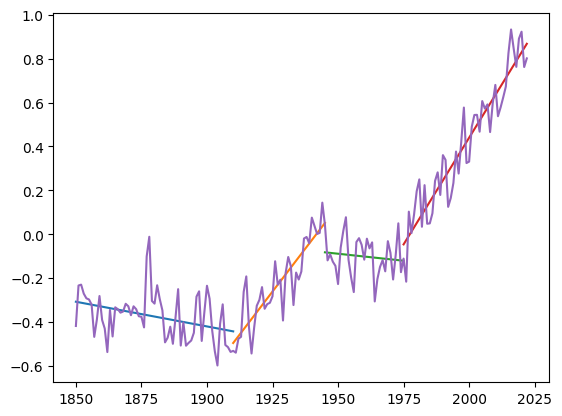

In [24]:
filtro1 = totale[totale['Time'] < 1850].index
filtro2 = totale[totale['Time'] > 1910].index
data = totale.drop(filtro1)
data = data.drop(filtro2)

fit_1850_1915 = regressione(data)
plt.plot(data['Time'] , fit_1850_1915[0])

filtro1 = totale[totale['Time'] < 1910].index
filtro2 = totale[totale['Time'] > 1945].index
data = totale.drop(filtro1)
data = data.drop(filtro2)

fit_1915_1945 = regressione(data)
plt.plot(data['Time'] , fit_1915_1945[0])


filtro1 = totale[totale['Time'] < 1945].index
filtro2 = totale[totale['Time'] > 1975].index
data = totale.drop(filtro1)
data = data.drop(filtro2)

fit_1945_1975 = regressione(data)
plt.plot(data['Time'] , fit_1945_1975[0])


filtro1 = totale[totale['Time'] < 1975].index
data = totale.drop(filtro1)

fit_post_1975 = regressione(data)
plt.plot(data['Time'] , fit_post_1975[0])

plt.plot(totale['Time'] , totale['Anomaly (deg C)'])

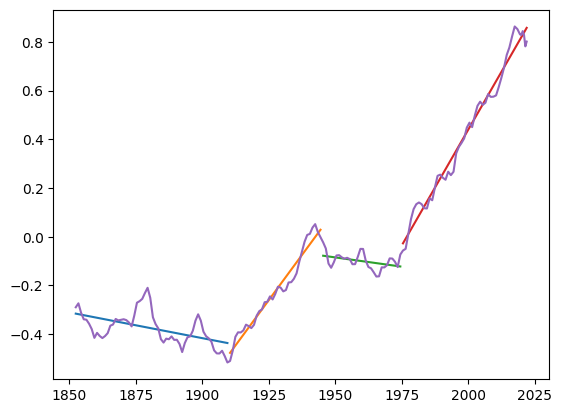

In [25]:
filtro1 = dati_linearizzati[dati_linearizzati['Time'] < 1850].index
filtro2 = dati_linearizzati[dati_linearizzati['Time'] > 1910].index
data = dati_linearizzati.drop(filtro1)
data = data.drop(filtro2)

fit_1850_1915 = regressione(data)
plt.plot(data['Time'] , fit_1850_1915[0])

filtro1 = dati_linearizzati[dati_linearizzati['Time'] < 1910].index
filtro2 = dati_linearizzati[dati_linearizzati['Time'] > 1945].index
data = dati_linearizzati.drop(filtro1)
data = data.drop(filtro2)

fit_1915_1945 = regressione(data)
plt.plot(data['Time'] , fit_1915_1945[0])


filtro1 = dati_linearizzati[dati_linearizzati['Time'] < 1945].index
filtro2 = dati_linearizzati[dati_linearizzati['Time'] > 1975].index
data = dati_linearizzati.drop(filtro1)
data = data.drop(filtro2)

fit_1945_1975 = regressione(data)
plt.plot(data['Time'] , fit_1945_1975[0])


filtro1 = dati_linearizzati[dati_linearizzati['Time'] < 1975].index
data = dati_linearizzati.drop(filtro1)

fit_post_1975 = regressione(data)
plt.plot(data['Time'] , fit_post_1975[0])

plt.plot(dati_linearizzati['Time'] , dati_linearizzati['Anomaly (deg C)'])

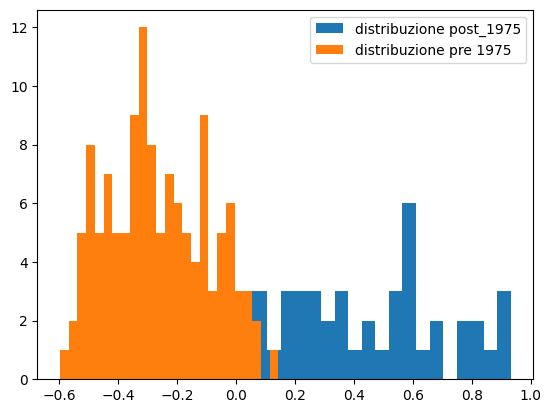

In [81]:
plt.hist(post_1975['Anomaly (deg C)'] , 25 , label = "distribuzione post_1975")
plt.hist(pre_1975['Anomaly (deg C)'] , 25 , label = "distribuzione pre 1975")
plt.legend()

(array([0.18883993, 0.56651978, 1.13303956, 1.32187948, 0.94419963,
        1.32187948, 0.94419963, 1.13303956, 2.07723919, 2.45491904,
        1.13303956, 1.13303956, 1.51071941, 1.13303956, 0.7553597 ,
        1.32187948, 0.94419963, 0.56651978, 1.32187948, 0.94419963,
        0.7553597 , 0.56651978, 0.94419963, 0.18883993, 0.37767985,
        0.37767985, 0.18883993, 0.56651978, 0.37767985, 0.        ,
        0.56651978, 0.37767985, 0.        , 0.18883993, 0.37767985,
        0.18883993, 0.        , 0.56651978, 0.7553597 , 0.56651978,
        0.        , 0.37767985, 0.        , 0.        , 0.37767985,
        0.18883993, 0.18883993, 0.18883993, 0.18883993, 0.37767985]),
 array([-0.5975614 , -0.56695163, -0.53634186, -0.50573209, -0.47512232,
        -0.44451255, -0.41390278, -0.38329301, -0.35268324, -0.32207346,
        -0.29146369, -0.26085392, -0.23024415, -0.19963438, -0.16902461,
        -0.13841484, -0.10780507, -0.0771953 , -0.04658553, -0.01597576,
         0.01463401,  0.04

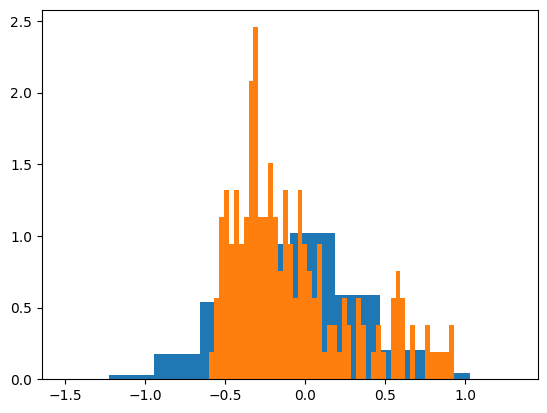

In [103]:
plt.hist(np.random.normal( totale['Anomaly (deg C)'].mean() , totale['Anomaly (deg C)'].std() , 10000) , density = True)
plt.hist(totale['Anomaly (deg C)'], 50,  density = True )

(array([0.26752279, 0.53504557, 1.33761393, 2.14018228, 1.33761393,
        1.8726595 , 1.33761393, 1.33761393, 2.40770507, 3.21027342,
        2.14018228, 1.33761393, 1.8726595 , 1.60513671, 1.33761393,
        1.07009114, 2.40770507, 0.80256836, 1.33761393, 1.60513671,
        0.80256836, 0.80256836, 0.53504557, 0.        , 0.26752279]),
 array([-0.5975614 , -0.56789474, -0.53822808, -0.50856142, -0.47889475,
        -0.44922809, -0.41956143, -0.38989477, -0.36022811, -0.33056145,
        -0.30089478, -0.27122812, -0.24156146, -0.2118948 , -0.18222814,
        -0.15256148, -0.12289481, -0.09322815, -0.06356149, -0.03389483,
        -0.00422817,  0.02543849,  0.05510516,  0.08477182,  0.11443848,
         0.14410514]),
 <BarContainer object of 25 artists>)

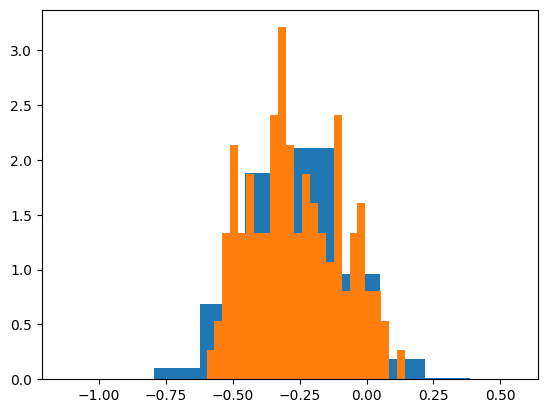

In [109]:
plt.hist(np.random.normal( pre_1975['Anomaly (deg C)'].mean() , pre_1975['Anomaly (deg C)'].std() , 1000000) , density = True)
plt.hist(pre_1975['Anomaly (deg C)'], 25,  density = True )

In [121]:
print(st.normaltest(totale['Anomaly (deg C)']))
print(st.normaltest(pre_1975['Anomaly (deg C)']))


NormaltestResult(statistic=23.20461218472354, pvalue=9.144974245518499e-06)
NormaltestResult(statistic=9.828700277606195, pvalue=0.007340486640167542)
